# Machine Learning with the Iris Sepal Dataset
### Step 1: Import Libraries and Load Data

Let's start by importing the necessary libraries and loading the "iris" dataset.

In [9]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import scikit-learn modules for machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the iris dataset
iris = sns.load_dataset('iris')

### Step 2: Data Preprocessing

Before building the machine learning model, we need to preprocess the data. We'll split the data into features (X) and target (y) and then split them into training and testing sets.

In [17]:
# Data preprocessing
# Separate features (X) and target (y)
X = iris[['sepal_length', 'sepal_width']]
y = iris['species']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (mean=0, standard deviation=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Step 3: Build and Train the Machine Learning Model

For this example, we'll use a logistic regression model, a simple and interpretable algorithm for multi-class classification tasks.

In [12]:
# Build and train the machine learning model (Logistic Regression)
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

### Step 4: Evaluate the Model

After training the model, we need to evaluate its performance using various metrics.

Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.88      0.78      0.82         9
   virginica       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



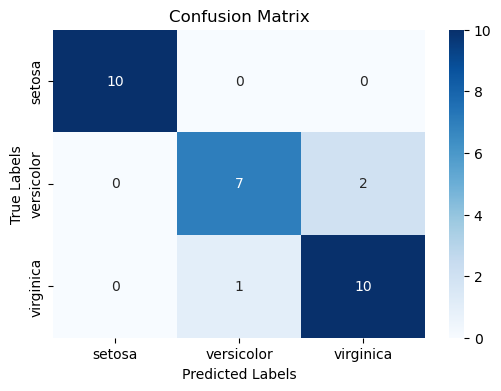

In [13]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Step 5: Making Predictions

Now that we have a trained model, we can use it to make predictions on new data.

In [14]:
# New data for prediction
new_data = pd.DataFrame({'sepal_length': [5.0, 6.2], 'sepal_width': [3.4, 2.8]})

# Standardize the new data using the same scaler
new_data_scaled = scaler.transform(new_data)

# Make predictions on the new data
predictions = model.predict(new_data_scaled)

# Display the predictions
for i in range(len(new_data)):
    print(f'Sepal Length: {new_data.iloc[i]["sepal_length"]:.1f}, Sepal Width: {new_data.iloc[i]["sepal_width"]:.1f} => Predicted Species: {predictions[i]}')


Sepal Length: 5.0, Sepal Width: 3.4 => Predicted Species: setosa
Sepal Length: 6.2, Sepal Width: 2.8 => Predicted Species: versicolor


### Conclusion

In this notebook, we performed machine learning on the "iris" dataset using the sepal features (Sepal Length and Sepal Width). We preprocessed the data, built a logistic regression model, evaluated its performance using accuracy, a classification report, and a confusion matrix, and finally, used the model to make predictions on new data. Machine learning is a powerful tool for making predictions and classifying data based on patterns learned from a given dataset